In [ ]:
#Create 6 diff ML models n select the best model n build confidence in it such that it has the most reliable accuracy
#result= Linear Discriminant Analysis is the best model with highest accuracy of 97%

In [3]:
#check version of python lib
import sys
print(format(sys.version))
#scipy
import scipy
print(format(scipy.__version__))
#numpy
import numpy
print(format(numpy.__version__))
#matplotlib
import matplotlib
print(format(matplotlib.__version__))
import pandas
print(format(pandas.__version__))
#sckit-learn
import sklearn
print(format(sklearn.__version__))

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
1.1.0
1.15.4
3.0.2
0.23.4
0.20.1


In [6]:
#load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'class']
dataset = pandas.read_csv(url, names=names)

In [9]:
print(dataset.shape)

(150, 5)


In [10]:
print(dataset.head(30))

    sepal-len  sepal-wid  petal-len  petal-wid        class
0         5.1        3.5        1.4        0.2  Iris-setosa
1         4.9        3.0        1.4        0.2  Iris-setosa
2         4.7        3.2        1.3        0.2  Iris-setosa
3         4.6        3.1        1.5        0.2  Iris-setosa
4         5.0        3.6        1.4        0.2  Iris-setosa
5         5.4        3.9        1.7        0.4  Iris-setosa
6         4.6        3.4        1.4        0.3  Iris-setosa
7         5.0        3.4        1.5        0.2  Iris-setosa
8         4.4        2.9        1.4        0.2  Iris-setosa
9         4.9        3.1        1.5        0.1  Iris-setosa
10        5.4        3.7        1.5        0.2  Iris-setosa
11        4.8        3.4        1.6        0.2  Iris-setosa
12        4.8        3.0        1.4        0.1  Iris-setosa
13        4.3        3.0        1.1        0.1  Iris-setosa
14        5.8        4.0        1.2        0.2  Iris-setosa
15        5.7        4.4        1.5     

In [11]:
print(dataset.describe())

        sepal-len   sepal-wid   petal-len   petal-wid
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [12]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


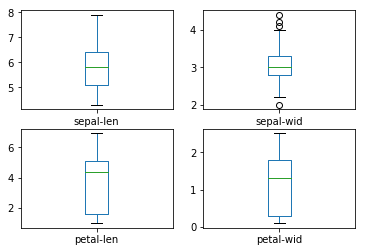

In [14]:
#univariant plot                                      sharex, y=x, y cordinated are being shared among all the coordinates
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

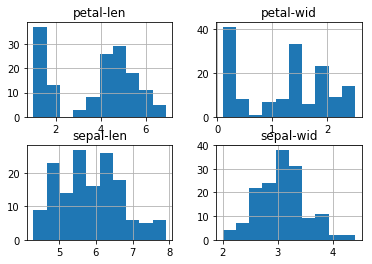

In [15]:
#histogram
dataset.hist()
plt.show

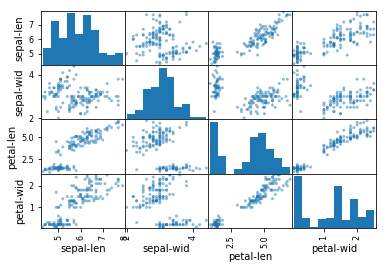

In [16]:
#scatter matrix
scatter_matrix(dataset)
plt.show()

In [19]:
#validation (training) dataset--to train model
array=dataset.values
x= array[:,0:4]
y= array[:, 4]
validation_size=0.2
seed =6
x_train, x_test, y_train, y_test= model_selection.train_test_split(x, y, test_size=validation_size, random_state = seed)

In [20]:
#test options and evaluation matrix
seed= 6
scoring ='accuracy'

In [28]:
#spot check ALgorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#evaluate each model in turn
results =[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results =model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.941667(0.038188)
LDA: 0.975000(0.038188)
KNN: 0.958333(0.055902)
CART: 0.941667(0.075000)
NB: 0.966667(0.055277)
SVM: 0.966667(0.055277)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

AttributeError: 'AxesSubplot' object has no attribute 'set_xticklables'

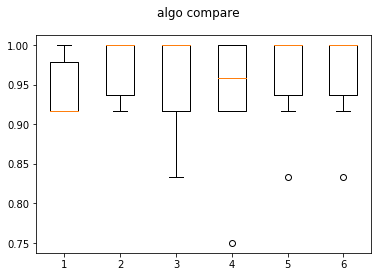

In [31]:
#compare Algo
fig= plt.figure()
fig.suptitle('algo compare')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklables(names)
plt.show()